In [18]:
import numpy as np

data0 = np.array([5.81402, 6.23813, -2.23364, -1.35096, 6.87927, 5.27339, -5.13202, -3.50809, -4.65843, 5.84847, -5.44073, 3.87277, 3.27558, -6.11934, 4.00284, -4.27126])
data1 = np.roll(data0, -1)
print('data1', data0)
print('data1', data1)

data_comp = data0 - data1
data_comp0 = np.where(data_comp < 0, 1, 0)
data_comp1 = np.where(data_comp > 0, 1, 0)

print('data_comp0', data_comp0)
print('data_comp1', data_comp1)

mask1 = np.zeros(data0.size, dtype=data0.dtype)
mask2 = np.zeros(data0.size, dtype=data0.dtype)
for i in range(0, len(data0), 4):
    mask1[i] = 1
    if (i+2) < data0.size:
        mask2[i+2] = 1

print(mask1)
print(mask2)

bool0 = mask1 * data_comp0
bool1 = mask2 * data_comp1

bool2 = bool0 + bool1

print(bool0)
print(bool1)
print(bool2)

bool2_ = np.roll(bool2, 1)
trans_matirx0 = bool2 + bool2_
print('trans_matrix0: ', trans_matirx0)

bool0 = data_comp0 * mask2
bool1 = data_comp1 * mask1

trans_matirx1 = bool0 + bool1
trans_matirx2 = np.roll(trans_matirx1, 1)

print('trans_matirx1: ', trans_matirx1)
print('trans_matirx2: ', trans_matirx2)

sum = data0 * trans_matirx0
sum += np.roll(data0, -1) * trans_matirx1
sum += np.roll(data0, -15) * trans_matirx2

print(sum)

data1 [ 5.81402  6.23813 -2.23364 -1.35096  6.87927  5.27339 -5.13202 -3.50809
 -4.65843  5.84847 -5.44073  3.87277  3.27558 -6.11934  4.00284 -4.27126]
data1 [ 6.23813 -2.23364 -1.35096  6.87927  5.27339 -5.13202 -3.50809 -4.65843
  5.84847 -5.44073  3.87277  3.27558 -6.11934  4.00284 -4.27126  5.81402]
data_comp0 [1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1]
data_comp1 [0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0]
[1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
trans_matrix0:  [1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]
trans_matirx1:  [0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
trans_matirx2:  [0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]
[ 5.81402  6.23813 -1.35096 -2.23364  5.27339  6.87927 -3.50809 -5.13202
 -4.65843  5.84847  3.87277 -5.44073 -6.11934  3.27558  4.00284 -4.27126]


In [ ]:
5.81402  6.23813 -1.35096 - 2.23364    5.27339  6.87927  -3.50809 -5.13202 -4.65843 5.84847  3.87277 -5.44073 -6.11934 3.27558 4.00284 -4.27126 
-2.23365 5.27342 6.8793   -3.5081      -5.13204 -4.65845 5.8485   3.87279  -5.44075 -6.11937 3.27559 4.00286  -4.27128 5.81404 6.23816 -1.35097 
0                                      1                                   0                                  0

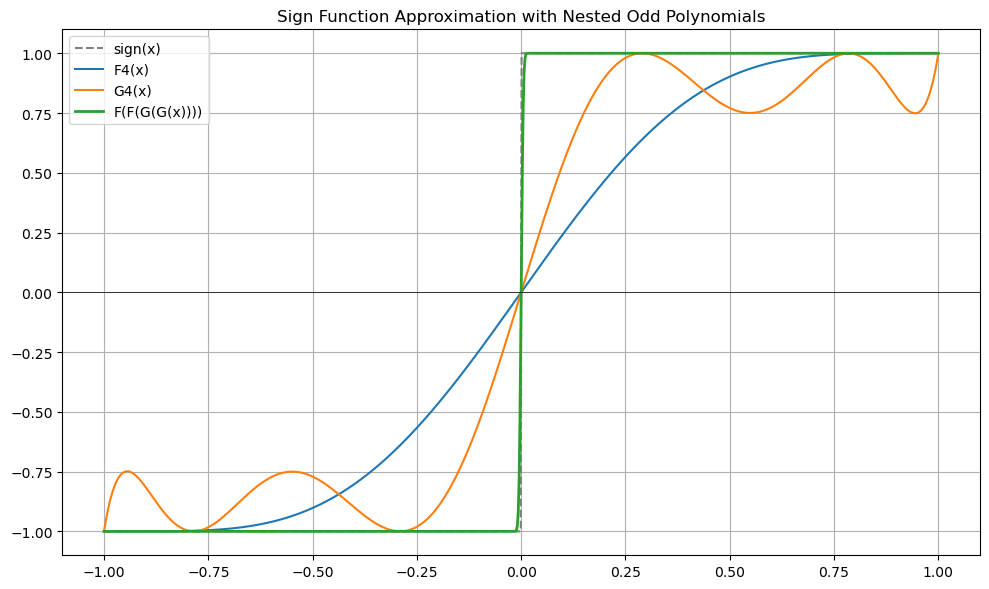

In [11]:

import numpy as np
import matplotlib.pyplot as plt

# Define F4 and G4 coefficients (scaled)
F4_raw = np.array([0, 315, 0, -420, 0, 378, 0, -180, 0, 35], dtype=np.double)
G4_raw = np.array([0, 5850, 0, -34974, 0, 97015, 0, -113492, 0, 46623], dtype=np.double)
F4_SCALE = 2 ** 7
G4_SCALE = 2 ** 10

# Scale coefficients
F4_coeffs = [c / F4_SCALE for c in F4_raw]
G4_coeffs = [c / G4_SCALE for c in G4_raw]

# Evaluate odd-degree polynomial: assumes only odd terms present
def eval_poly(coeffs, x):
    return sum(coeffs[i] * x**i for i in range(len(coeffs)) if i % 2 == 1)

# Apply nested evaluation: f(f(...f(g(g(...g(x))))))
def nested_eval(x, g_coeffs, f_coeffs, d_g=1, d_f=1):
    y = x.copy()
    for _ in range(d_g):
        y = eval_poly(g_coeffs, y)
    for _ in range(d_f):
        y = eval_poly(f_coeffs, y)
    return y

# Domain
x = np.linspace(-1, 1, 1000)

# Evaluate and plot
y_sign = np.sign(x)
y_f4 = eval_poly(F4_coeffs, x)
# y_f4 = eval_poly(F4_coeffs, y_f4)
# y_f4 = eval_poly(F4_coeffs, y_f4)

y_g4 = eval_poly(G4_coeffs, x)
# y_g4 = eval_poly(G4_coeffs, y_g4)

y_nested = nested_eval(x, G4_coeffs, F4_coeffs, d_g=2, d_f=2)

plt.figure(figsize=(10, 6))
plt.plot(x, y_sign, label='sign(x)', linestyle='--', color='gray')
plt.plot(x, y_f4, label='F4(x)', linewidth=1.5)
plt.plot(x, y_g4, label='G4(x)', linewidth=1.5)
plt.plot(x, y_nested, label='F(F(G(G(x))))', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('Sign Function Approximation with Nested Odd Polynomials')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()